In [1]:
from assignment2_index import index
import os

Index built in 0.41977500915527344 seconds.
Query executed in 0.9921479225158691 seconds.
Text-362.txt 0.11725529780044743
Text-97.txt 0.06251244617247637
Text-92.txt 0.04993529156582264
Text-215.txt 0.03993487561069914
Text-39.txt 0.03780452919388623
Text-65.txt 0.035318199163999295
Text-152.txt 0.034355377030853056
Text-280.txt 0.030060303946199827
Text-252.txt 0.02572218353084454
Text-163.txt 0.0
Text-177.txt 0.0
Text-188.txt 0.0
Text-407.txt 0.0
Text-361.txt 0.0
Text-375.txt 0.0
Text-413.txt 0.0
Text-43.txt 0.0
Text-349.txt 0.0
Text-57.txt 0.0
Text-80.txt 0.0
Text-94.txt 0.0
Text-201.txt 0.0
Text-229.txt 0.0
Text-1.txt 0.0
Text-228.txt 0.0
Text-200.txt 0.0
Text-214.txt 0.0
Text-95.txt 0.0
Text-81.txt 0.0
Text-56.txt 0.0
Text-348.txt 0.0
Text-42.txt 0.0
Text-374.txt 0.0
Text-412.txt 0.0
Text-406.txt 0.0
Text-360.txt 0.0
Text-189.txt 0.0
Text-176.txt 0.0
Text-162.txt 0.0
Text-174.txt 0.0
Text-160.txt 0.0
Text-148.txt 0.0
Text-410.txt 0.0
Text-376.txt 0.0
Text-68.txt 0.0
Text-404.txt 

In [2]:
query_terms = ["murder", "trial"]

In [3]:
a = index("collection")

Index built in 0.4439108371734619 seconds.


Create relevant and nonrelevant sets using exact query

In [4]:
all_documents = os.listdir("collection")
exact_documents = a.exact_query(query_terms, 9)
all_documents = set(all_documents)

Query executed in 1.0429649353027344 seconds.
Text-83.txt 0.1247059814746881
Text-143.txt 0.09809975914223484
Text-342.txt 0.07566357062624178
Text-196.txt 0.07209523018618307
Text-153.txt 0.06451340444181115
Text-367.txt 0.05019685298931096
Text-382.txt 0.04903465997771923
Text-194.txt 0.04087469007911357
Text-372.txt 0.04015515562176471
Text-410.txt 0.03751690660661416
Text-304.txt 0.03683382293250717
Text-250.txt 0.035481442284871774
Text-119.txt 0.035052012044930164
Text-407.txt 0.033322056619774415
Text-213.txt 0.033254037798375304
Text-188.txt 0.03288990189855445
Text-64.txt 0.02938672849990163
Text-355.txt 0.02903320138188776
Text-122.txt 0.029006225527298594
Text-204.txt 0.028791549865486068
Text-59.txt 0.028020040119786194
Text-16.txt 0.02773220820188326
Text-235.txt 0.027609795068328245
Text-359.txt 0.026607317555107087
Text-69.txt 0.026322821220402037
Text-179.txt 0.025679345885672448
Text-90.txt 0.02551155230865321
Text-88.txt 0.024949471346119866
Text-108.txt 0.02467293478

In [5]:
relevant = set(exact_documents)
non_relevant = all_documents.difference(relevant)

Create retrieved and not retrieved sets 

In [6]:
retrieved = set(a.inexact_query_champion(query_terms, 9))
not_retrieved = all_documents.difference(retrieved)

Query executed in 1.0609769821166992 seconds.


Calculate Precision, Recall, And F score 𝛼=0.5

In [7]:
tp = relevant.intersection(retrieved)
fp = non_relevant.intersection(retrieved)
fn = relevant.intersection(not_retrieved)

In [8]:
precision = len(tp)/(len(tp) + len(fp))
print(precision)

0.2222222222222222


In [9]:
recall = len(tp)/(len(tp) + len(fn))
print(recall)

0.2222222222222222


In [10]:
beta = 1
alpha = 0.5

if precision == 0:
    f = 0
else:
    f = ((beta**2 + 1)*precision*recall)/((beta**2)*precision + recall)
print(f)

0.2222222222222222


In [11]:
def champion_performance(k):
    all_documents = os.listdir("collection")
    exact_documents = a.exact_query(query_terms, k)
    all_documents = set(all_documents)
    
    relevant = set(exact_documents)
    non_relevant = all_documents.difference(relevant)

    retrieved = set(a.inexact_query_champion(query_terms, k))
    not_retrieved = all_documents.difference(retrieved)

    tp = relevant.intersection(retrieved)
    fp = non_relevant.intersection(retrieved)
    fn = relevant.intersection(not_retrieved)
    
    precision = len(tp)/(len(tp) + len(fp))
    recall = len(tp)/(len(tp) + len(fn))
    beta = 1
    alpha = 0.5

    if ((beta**2)*precision + recall) == 0:
        f = 0
    else:
        f = ((beta**2 + 1)*precision*recall)/((beta**2)*precision + recall)

    print(f"Champion List Performance: P: {precision}, R: {recall}, F:{f}")
    return (precision, recall, f)

In [12]:
champ = [[i, champion_performance(i)[2]] for i in range(1, 51)]

Query executed in 1.0074272155761719 seconds.
Text-83.txt 0.1247059814746881
Text-143.txt 0.09809975914223484
Text-342.txt 0.07566357062624178
Text-196.txt 0.07209523018618307
Text-153.txt 0.06451340444181115
Text-367.txt 0.05019685298931096
Text-382.txt 0.04903465997771923
Text-194.txt 0.04087469007911357
Text-372.txt 0.04015515562176471
Text-410.txt 0.03751690660661416
Text-304.txt 0.03683382293250717
Text-250.txt 0.035481442284871774
Text-119.txt 0.035052012044930164
Text-407.txt 0.033322056619774415
Text-213.txt 0.033254037798375304
Text-188.txt 0.03288990189855445
Text-64.txt 0.02938672849990163
Text-355.txt 0.02903320138188776
Text-122.txt 0.029006225527298594
Text-204.txt 0.028791549865486068
Text-59.txt 0.028020040119786194
Text-16.txt 0.02773220820188326
Text-235.txt 0.027609795068328245
Text-359.txt 0.026607317555107087
Text-69.txt 0.026322821220402037
Text-179.txt 0.025679345885672448
Text-90.txt 0.02551155230865321
Text-88.txt 0.024949471346119866
Text-108.txt 0.02467293478

In [13]:
def index_elimination_performance(k):
    all_documents = os.listdir("collection")
    exact_documents = a.exact_query(query_terms, k)
    all_documents = set(all_documents)
    
    relevant = set(exact_documents)
    non_relevant = all_documents.difference(relevant)

    retrieved = set(a.inexact_query_index_elimination(query_terms, k))
    not_retrieved = all_documents.difference(retrieved)

    tp = relevant.intersection(retrieved)
    fp = non_relevant.intersection(retrieved)
    fn = relevant.intersection(not_retrieved)
    
    precision = len(tp)/(len(tp) + len(fp))
    recall = len(tp)/(len(tp) + len(fn))
    beta = 1
    alpha = 0.5

    if ((beta**2)*precision + recall) == 0:
        f = 0
    else:
        f = ((beta**2 + 1)*precision*recall)/((beta**2)*precision + recall)

    print(f"Champion List Performance: P: {precision}, R: {recall}, F:{f}")
    return (precision, recall, f)

In [14]:
index_elimination = [[i, index_elimination_performance(i)[2]] for i in range(1, 51)]

Query executed in 0.9968361854553223 seconds.
Text-83.txt 0.1247059814746881
Text-143.txt 0.09809975914223484
Text-342.txt 0.07566357062624178
Text-196.txt 0.07209523018618307
Text-153.txt 0.06451340444181115
Text-367.txt 0.05019685298931096
Text-382.txt 0.04903465997771923
Text-194.txt 0.04087469007911357
Text-372.txt 0.04015515562176471
Text-410.txt 0.03751690660661416
Text-304.txt 0.03683382293250717
Text-250.txt 0.035481442284871774
Text-119.txt 0.035052012044930164
Text-407.txt 0.033322056619774415
Text-213.txt 0.033254037798375304
Text-188.txt 0.03288990189855445
Text-64.txt 0.02938672849990163
Text-355.txt 0.02903320138188776
Text-122.txt 0.029006225527298594
Text-204.txt 0.028791549865486068
Text-59.txt 0.028020040119786194
Text-16.txt 0.02773220820188326
Text-235.txt 0.027609795068328245
Text-359.txt 0.026607317555107087
Text-69.txt 0.026322821220402037
Text-179.txt 0.025679345885672448
Text-90.txt 0.02551155230865321
Text-88.txt 0.024949471346119866
Text-108.txt 0.02467293478

In [15]:
def cluster_pruning_performance(k):
    all_documents = os.listdir("collection")
    exact_documents = a.exact_query(query_terms, k)
    all_documents = set(all_documents)
    
    relevant = set(exact_documents)
    non_relevant = all_documents.difference(relevant)

    retrieved = set(a.inexact_query_cluster_pruning(query_terms, k))
    not_retrieved = all_documents.difference(retrieved)

    tp = relevant.intersection(retrieved)
    fp = non_relevant.intersection(retrieved)
    fn = relevant.intersection(not_retrieved)
    
    precision = len(tp)/(len(tp) + len(fp))
    recall = len(tp)/(len(tp) + len(fn))
    beta = 1
    alpha = 0.5

    if precision == 0:
        f = 0
    else:
        f = ((beta**2 + 1)*precision*recall)/((beta**2)*precision + recall)

    print(f"Champion List Performance: P: {precision}, R: {recall}, F:{f}")
    return (precision, recall, f)

In [16]:
cluster = [[i, cluster_pruning_performance(i)[2]] for i in range(1, 51)]

Query executed in 1.018815040588379 seconds.
Text-83.txt 0.1247059814746881
Text-143.txt 0.09809975914223484
Text-342.txt 0.07566357062624178
Text-196.txt 0.07209523018618307
Text-153.txt 0.06451340444181115
Text-367.txt 0.05019685298931096
Text-382.txt 0.04903465997771923
Text-194.txt 0.04087469007911357
Text-372.txt 0.04015515562176471
Text-410.txt 0.03751690660661416
Text-304.txt 0.03683382293250717
Text-250.txt 0.035481442284871774
Text-119.txt 0.035052012044930164
Text-407.txt 0.033322056619774415
Text-213.txt 0.033254037798375304
Text-188.txt 0.03288990189855445
Text-64.txt 0.02938672849990163
Text-355.txt 0.02903320138188776
Text-122.txt 0.029006225527298594
Text-204.txt 0.028791549865486068
Text-59.txt 0.028020040119786194
Text-16.txt 0.02773220820188326
Text-235.txt 0.027609795068328245
Text-359.txt 0.026607317555107087
Text-69.txt 0.026322821220402037
Text-179.txt 0.025679345885672448
Text-90.txt 0.02551155230865321
Text-88.txt 0.024949471346119866
Text-108.txt 0.024672934784

In [17]:
print(cluster)

[[1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 0], [22, 0], [23, 0], [24, 0], [25, 0], [26, 0], [27, 0], [28, 0], [29, 0], [30, 0], [31, 0], [32, 0], [33, 0], [34, 0], [35, 0], [36, 0], [37, 0], [38, 0], [39, 0], [40, 0], [41, 0], [42, 0], [43, 0], [44, 0.022727272727272728], [45, 0.044444444444444446], [46, 0.043478260869565216], [47, 0.06382978723404255], [48, 0.08333333333333333], [49, 0.10204081632653061], [50, 0.12]]


In [18]:
from matplotlib import pyplot as plt
import numpy as np

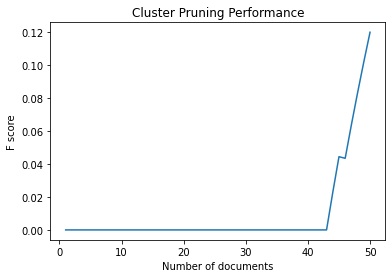

In [19]:
data = np.array(cluster)
x, y = data.T
plt.title("Cluster Pruning Performance")
plt.xlabel("Number of documents")
plt.ylabel("F score")
plt.plot(x, y)
plt.show()

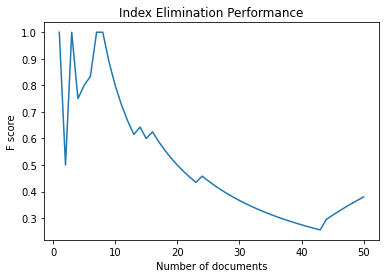

In [20]:
data = np.array(index_elimination)
x, y = data.T
plt.title("Index Elimination Performance")
plt.xlabel("Number of documents")
plt.ylabel("F score")
plt.plot(x, y)
plt.show()

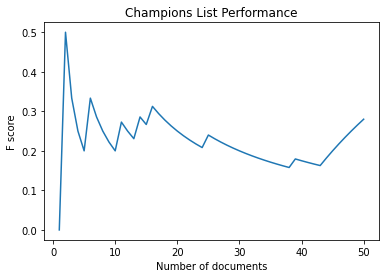

In [21]:
data = np.array(champ)
x, y = data.T
plt.plot(x, y)
plt.title("Champions List Performance")
plt.xlabel("Number of documents")
plt.ylabel("F score")
plt.show()